```
!pip3.10 install swig
!pip3.10 install gym[box2d]
!pip3.10 install imageio imageio[ffmpeg]
!pip3.10 install stable-baselines3[extra]
!pip3.10 install -e ../
```

In [1]:
import gymnasium as gym
from IPython.display import Video
import sys
import os

os.environ["SDL_VIDEODRIVER"] = "dummy" # this stops pygame opening it's own window


In [2]:
%load_ext autoreload

In [3]:
import gymnasium as gym
from environments.model_ready_boids import RavenChasingBoids

from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy


In [4]:
%autoreload 2
# Now import the function
import gym_utils
import controllers
import agents
import runners
import environments
from environments.simple_boids import PureBoinds, BoidsWithRavenoid
from gym_utils.vis import create_environment_video

In [5]:
env.action_space.sample()

NameError: name 'env' is not defined

In [ ]:
env = PureBoinds(100, render_mode="rgb_array")


# Create a video
video_filename = 'boids.mp4'
create_environment_video(env, video_filename, steps=200)

# Display the video
Video(video_filename)

In [18]:
env = BoidsWithRavenoid(100, render_mode="rgb_array")


# Create a video
video_filename = 'boids.mp4'
create_environment_video(env, video_filename, steps=200)

# Display the video
Video(video_filename)

In [7]:
from environments.model_ready_boids import RavenChasingBoids

class AlternatingActionModel:
    def __init__(self, env):
        self.action_space = env.action_space
        self.step_count = 0
        self.env = env

    def predict(self, observation, state=None, episode_start=None, deterministic=None):
        # Define the policy: alternate between action 1 and action 2 every 4 steps
        action_period = 4
        if (self.step_count // action_period) % 2 == 0:
            action = 1  # Use action 1 for 4 steps
        else:
            action = 2  # Then switch to action 2 for the next 4 steps

        self.step_count += 1
        return action, state

    def get_env(self): return self.env
        
env = RavenChasingBoids(10, render_mode="rgb_array")
print(env.history)
model = AlternatingActionModel(env)

from gym_utils.vis import create_environment_video_with_model

video_filename = 'mock_boids.mp4'
create_environment_video_with_model(model, video_filename, steps=1000)
print(env.history)
Video(video_filename)

[]
0 steps taken. Average steps per episode: nan


/Users/patrick/Projects/active_projects/zero-player-games/zero-player-games/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/patrick/Projects/active_projects/zero-player-games/zero-player-games/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[]


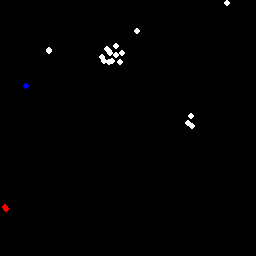

In [8]:
from PIL import Image
env = RavenChasingBoids(20, render_mode="rgb_array")
env.step(0)
for i in range(1000):
    env.step(0)
arr = env.render()
Image.fromarray(arr)

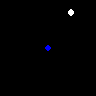

In [9]:
Image.fromarray(env._get_obs())

In [10]:
from environments.model_ready_boids import RavenChasingBoids


from stable_baselines3.common.env_checker import check_env
env = RavenChasingBoids(20, render_mode="rgb_array")
check_env(env)


0 steps taken. Average steps per episode: nan
0 steps taken. Average steps per episode: nan
1 steps taken. Average steps per episode: nan


In [ ]:
# wow, that passed

In [21]:


# Create environment
env = RavenChasingBoids(20, render_mode="rgb_array")

# Instantiate the agent
model = DQN("MlpPolicy", env, verbose=1)
# Train the agent and display a progress bar
model.learn(total_timesteps=int(2e6))


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
0 steps taken. Average steps per episode: nan


/Users/patrick/Projects/active_projects/zero-player-games/zero-player-games/lib/python3.10/site-packages/stable_baselines3/common/buffers.py:231: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 55.31GB > 4.70GB
  warnings.warn(


895 steps taken. Average steps per episode: 895.0
1001 steps taken. Average steps per episode: 948.0
1001 steps taken. Average steps per episode: 965.6666666666666
1001 steps taken. Average steps per episode: 974.5
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 974      |
|    ep_rew_mean      | 1.5      |
|    exploration_rate | 0.981    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 248      |
|    time_elapsed     | 15       |
|    total_timesteps  | 3898     |
----------------------------------
1001 steps taken. Average steps per episode: 979.8
616 steps taken. Average steps per episode: 919.1666666666666
550 steps taken. Average steps per episode: 866.4285714285714
1001 steps taken. Average steps per episode: 883.25
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 883      |
|    ep_rew_mean      | 1.88     |
|    exploration_rate | 0.966    

KeyboardInterrupt: 

In [40]:
print(history)


   0% ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9,020/2,000,000  [ 0:01:32 < 6:06:56 , 90 it/s ]

In [13]:
model.save("ravenoid_200k_its")

In [14]:
model = DQN.load("ravenoid_200k_its", env=env)
mean_reward, std_reward = evaluate_policy(model, model.get_env(), n_eval_episodes=10)



Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
391 steps taken. Average steps per episode: 749.7912087912088


/Users/patrick/Projects/active_projects/zero-player-games/zero-player-games/lib/python3.10/site-packages/stable_baselines3/common/buffers.py:231: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 55.31GB > 5.36GB
  warnings.warn(


1001 steps taken. Average steps per episode: 750.7080291970802
639 steps taken. Average steps per episode: 750.3018181818181
1001 steps taken. Average steps per episode: 751.2101449275362
1001 steps taken. Average steps per episode: 752.1119133574007
822 steps taken. Average steps per episode: 752.363309352518
1001 steps taken. Average steps per episode: 753.2544802867384
1001 steps taken. Average steps per episode: 754.1392857142857
352 steps taken. Average steps per episode: 752.7081850533808
1001 steps taken. Average steps per episode: 753.5886524822695
397 steps taken. Average steps per episode: 752.3286219081272


In [15]:
print(mean_reward, std_reward)

1.6 1.2806248474865698


In [19]:
env = RavenChasingBoids(20, render_mode="rgb_array")
model = DQN.load("ravenoid_200k_its", env=env)

video_filename = 'ravenoid.mp4'
create_environment_video_with_model(model, video_filename, steps=2000)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
0 steps taken. Average steps per episode: nan


/Users/patrick/Projects/active_projects/zero-player-games/zero-player-games/lib/python3.10/site-packages/stable_baselines3/common/buffers.py:231: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 55.31GB > 4.87GB
  warnings.warn(


475 steps taken. Average steps per episode: 475.0


In [20]:
Video(video_filename)

In [5]:
from gym_utils.vis import create_environment_video_with_model
from stable_baselines3 import DQN
from environments.model_ready_boids import RavenChasingBoids


In [10]:
env = RavenChasingBoids(20, render_mode="rgb_array")


In [11]:
env.n_boids

20